In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score

In [3]:
df=pd.read_csv("samsungMobilesData.csv",index_col='name')
df.head(10)

,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
name,,,,,,,,,,
"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12
"SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12
"SAMSUNG Galaxy F04 (Jade Purple, 64 GB)",4.2,6999,https://rukminim2.flixcart.com/image/312/312/x...,13,LCD,5000,64,4,not mentioned,12
"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",4.2,6999,https://rukminim2.flixcart.com/image/312/312/x...,13,LCD,5000,64,4,not mentioned,12
"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",4.2,13990,https://rukminim2.flixcart.com/image/312/312/x...,50,LCD,6000,128,6,not mentioned,13


In [4]:
#remove unwanted features from the dataframe
df=df.drop(['imgURL','android_version'],axis=1)

In [5]:
#check any null value are in
df.isna().sum()

ratings      0
price        0
camera       0
display      0
battery      0
storage      0
ram          0
processor    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB) to SAMSUNG Galaxy S22 (Pink Gold, 128 GB)
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ratings    407 non-null    float64
 1   price      407 non-null    int64  
 2   camera     407 non-null    int64  
 3   display    407 non-null    object 
 4   battery    407 non-null    int64  
 5   storage    407 non-null    int64  
 6   ram        407 non-null    int64  
 7   processor  407 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 28.6+ KB


In [7]:
df

,ratings,price,camera,display,battery,storage,ram,processor
name,,,,,,,,
"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,50,other_types,6000,64,4,not mentioned
"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,50,other_types,6000,128,4,not mentioned
"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,50,other_types,6000,128,4,not mentioned
"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,50,other_types,6000,128,4,not mentioned
"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor
...,...,...,...,...,...,...,...,...
"SAMSUNG Galaxy M40 (Seawater Blue, 128 GB)",4.5,21490,32,other_types,3500,128,6,not mentioned
"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",4.3,16199,25,other_types,4000,64,4,not mentioned
"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",4.4,9000,13,other_types,3300,32,2,Snapdragon425P


In [8]:
df['camera'].value_counts()

camera
50     112
48      98
64      64
13      63
12      15
8       14
108     10
32       8
25       7
5        5
200      3
24       3
16       3
0        1
3        1
Name: count, dtype: int64

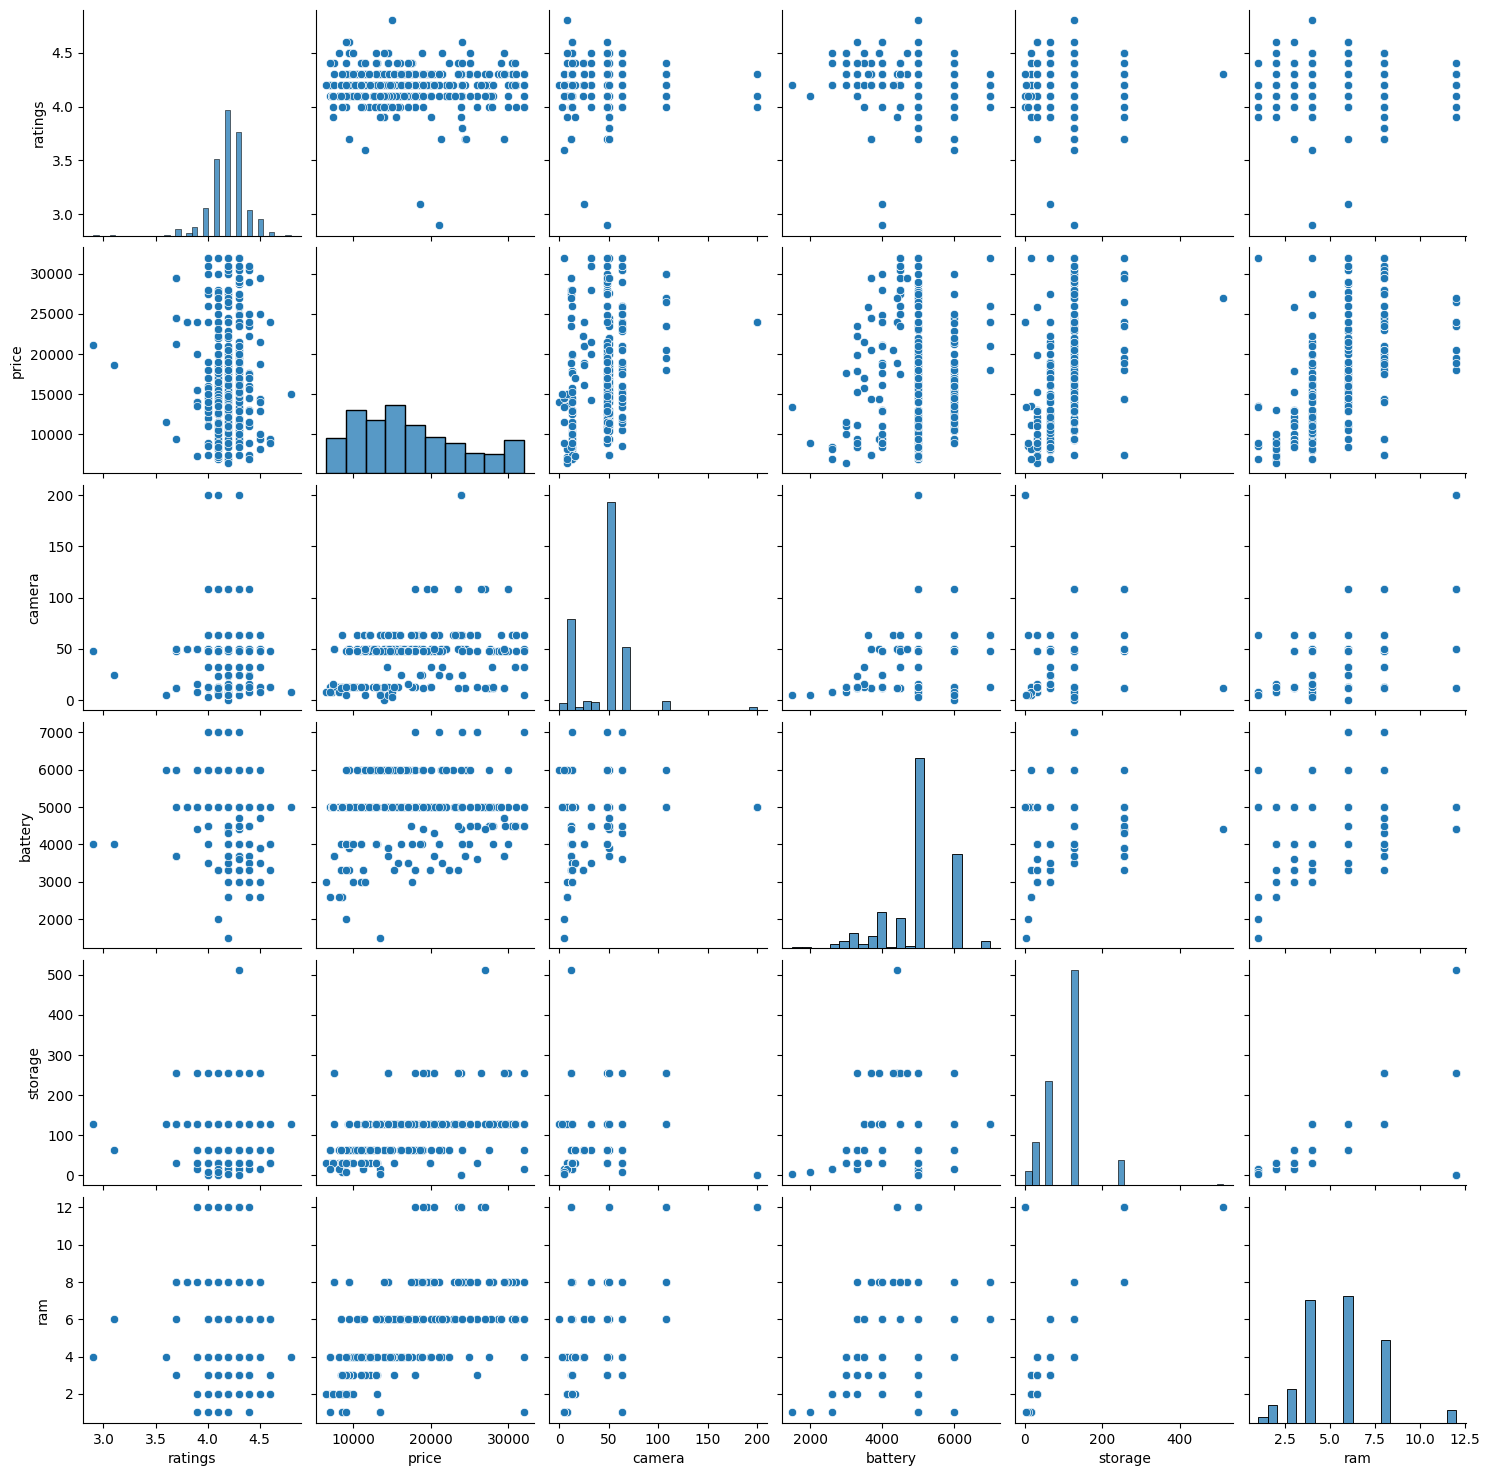

In [9]:
#use pairplot to see all features ,that they have any outliers
main_data = df[['ratings', 'price', 'camera', 'battery', 'storage', 'ram']]
sns.pairplot(main_data, diag_kind='hist')
plt.show()

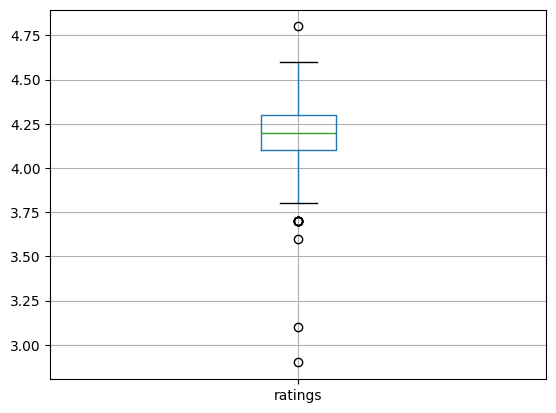

In [10]:
#use boxplot to see "ratings" feature hae any outliers
df.boxplot(column="ratings")
plt.show()

In [11]:
df.ratings.describe()

count    407.00000
mean       4.19828
std        0.17762
min        2.90000
25%        4.10000
50%        4.20000
75%        4.30000
max        4.80000
Name: ratings, dtype: float64

In [12]:
#use this method to clean the outliers,If the features are skewed

In [13]:
# Lets compute the Interquantile range to calculate the boundaries
IQR=df.ratings.quantile(0.75)-df.ratings.quantile(0.25)

In [14]:
lower_bridge=df['ratings'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['ratings'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

3.7999999999999994
4.6


(None, None)

In [15]:
df1=df.copy()
df1.loc[df1['ratings']>=4.6,'ratings']=4.6
df1.loc[df1['ratings']<=3.7999999999999994,'ratings']=3.7999999999999994

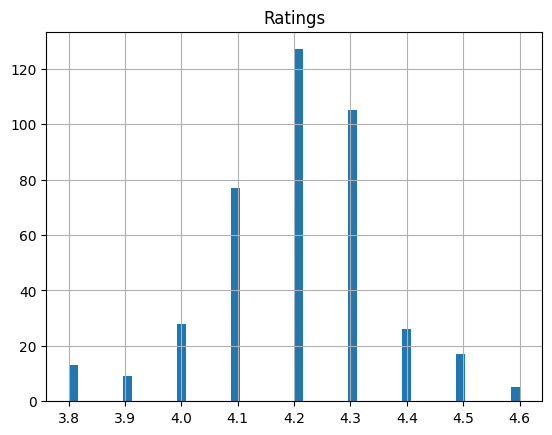

In [16]:
figure=df1.ratings.hist(bins=50)
figure.set_title('Ratings')
plt.show()

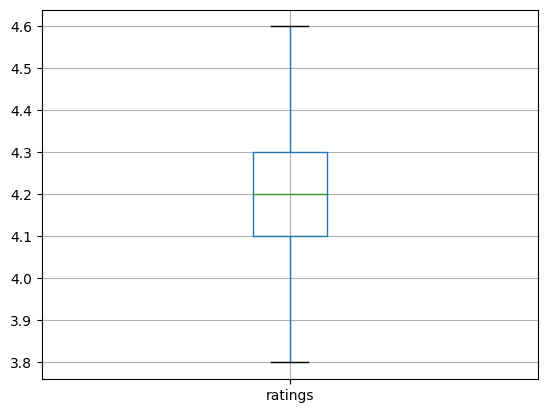

In [17]:
#no outliers in the "ratings" feature
df.ratings=df1.ratings
df.boxplot(column="ratings")
plt.show()

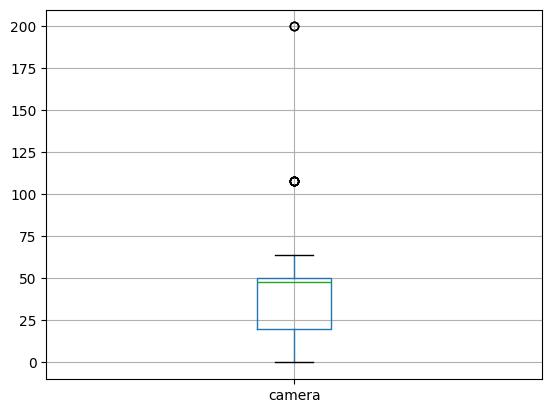

In [18]:
df.boxplot(column="camera")
plt.show()

In [19]:
IQR=df.camera.quantile(0.75)-df.camera.quantile(0.25)
lower_bridge=df['camera'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['camera'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)
df1=df.copy()

-25.0
95.0


In [20]:
df1.loc[df1['camera']>=95.0,'camera']=95.0
df1.loc[df1['camera']<=-25.0,'camera']=-25.0

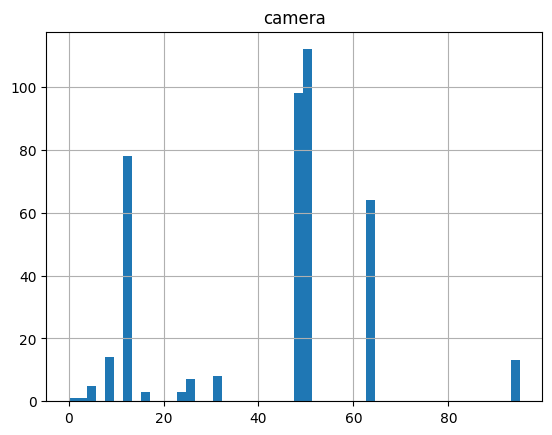

In [21]:
figure=df1.camera.hist(bins=50)
figure.set_title('camera')
plt.show()

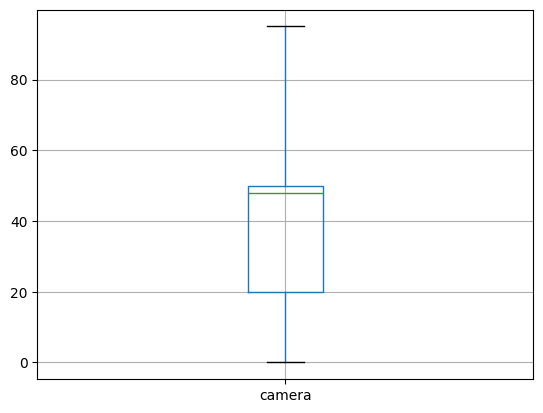

In [22]:
df.camera=df1.camera
df.boxplot(column="camera")
plt.show()

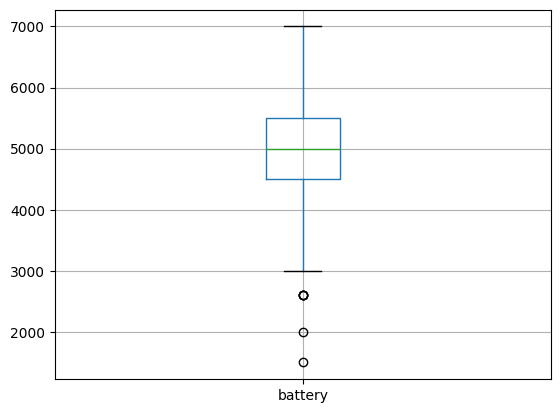

In [23]:
df.boxplot(column="battery")
plt.show()

In [24]:
IQR=df.battery.quantile(0.75)-df.battery.quantile(0.25)
lower_bridge=df['battery'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['battery'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)
df1=df.copy()

3000.0
7000.0


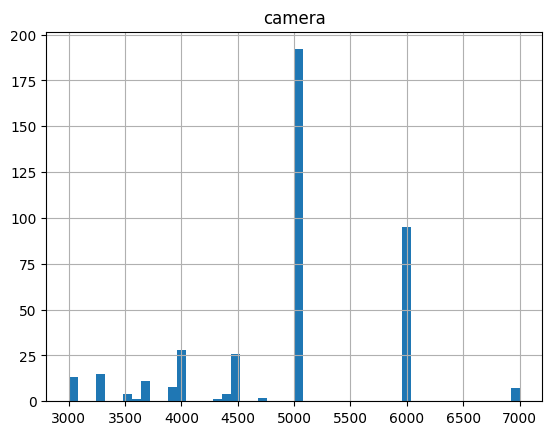

In [25]:
df1.loc[df1['battery']>=7000.0,'battery']=7000.0
df1.loc[df1['battery']<3000.0,'battery']=3000.0
figure=df1.battery.hist(bins=50)
figure.set_title('camera')
plt.show()

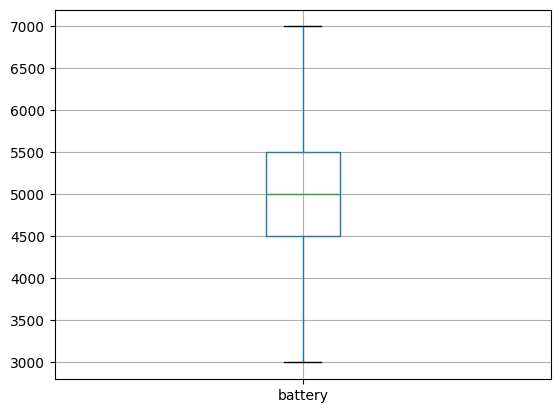

In [26]:
df.battery=df1.battery
df.boxplot(column="battery")
plt.show()

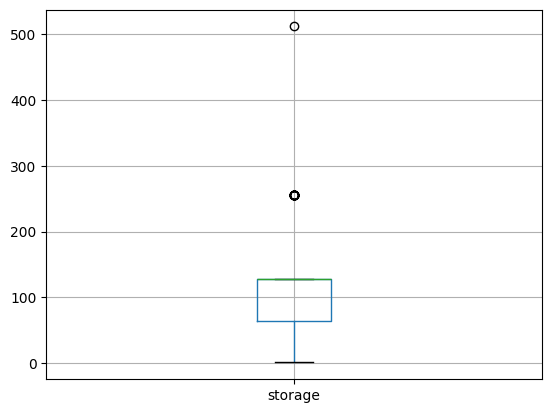

In [27]:
df.boxplot(column="storage")
plt.show()

In [28]:
IQR=df.storage.quantile(0.75)-df.storage.quantile(0.25)
lower_bridge=df['storage'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['storage'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)
df1=df.copy()

-32.0
224.0


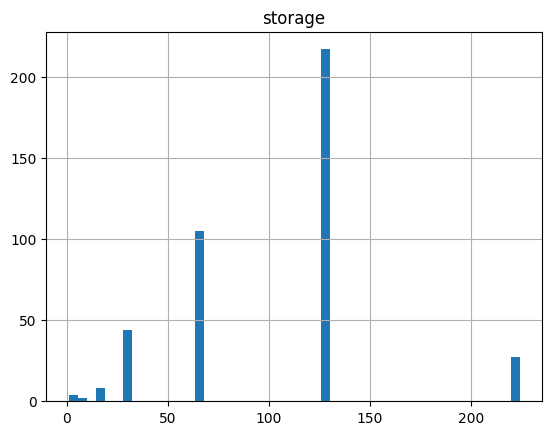

In [29]:
df1.loc[df1['storage']>=224.0,'storage']=224.0
df1.loc[df1['storage']<-32.0,'storage']=-32.0
figure=df1.storage.hist(bins=50)
figure.set_title('storage')
plt.show()

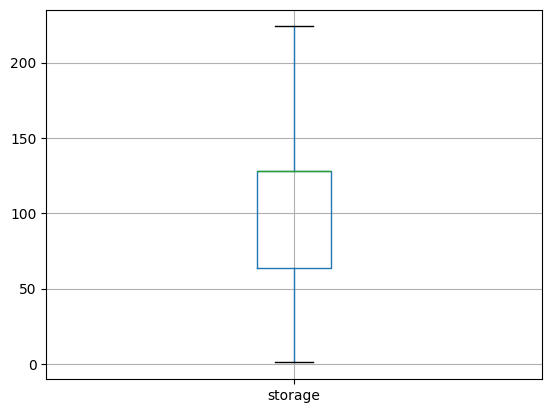

In [30]:
df.storage=df1.storage
df.boxplot(column="storage")
plt.show()

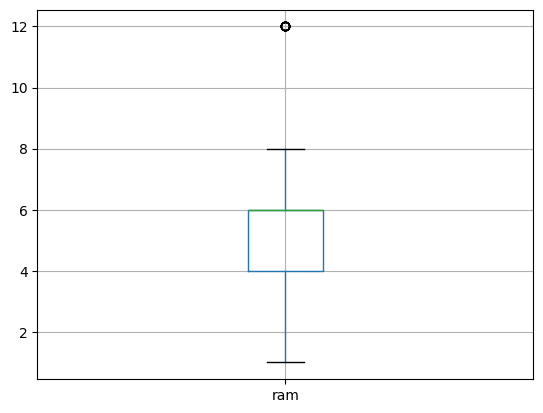

In [31]:
df.boxplot(column="ram")
plt.show()

In [32]:
IQR=df.ram.quantile(0.75)-df.ram.quantile(0.25)
lower_bridge=df['ram'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['ram'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)
df1=df.copy()

1.0
9.0


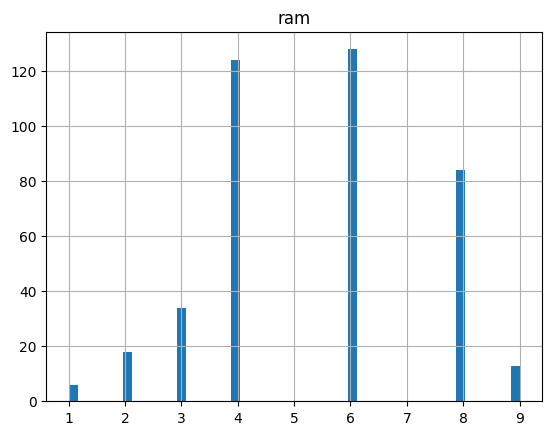

In [33]:
df1.loc[df1['ram']>=9.0,'ram']=9.0
df1.loc[df1['ram']<=1.0,'ram']=1.0
figure=df1.ram.hist(bins=50)
figure.set_title('ram')
plt.show()

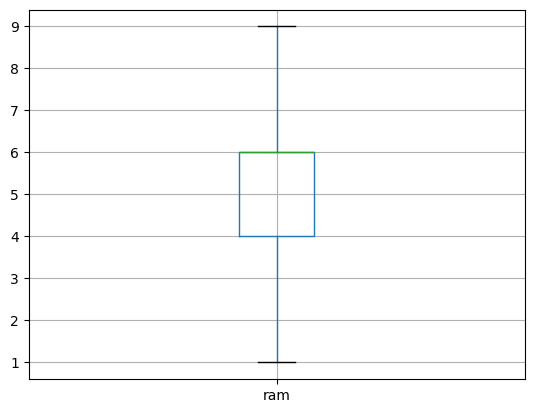

In [34]:
df.ram=df1.ram
df.boxplot(column="ram")
plt.show()

In [35]:
#After clean the outliers in all the features
df.head(10)

,ratings,price,camera,display,battery,storage,ram,processor
name,,,,,,,,
"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,50,other_types,6000,64,4,not mentioned
"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,50,other_types,6000,128,4,not mentioned
"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,50,other_types,6000,128,4,not mentioned
"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,50,other_types,6000,128,4,not mentioned
"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor
"SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)",4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor
"SAMSUNG Galaxy F04 (Jade Purple, 64 GB)",4.2,6999,13,LCD,5000,64,4,not mentioned
"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",4.2,6999,13,LCD,5000,64,4,not mentioned
"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",4.2,13990,50,LCD,6000,128,6,not mentioned


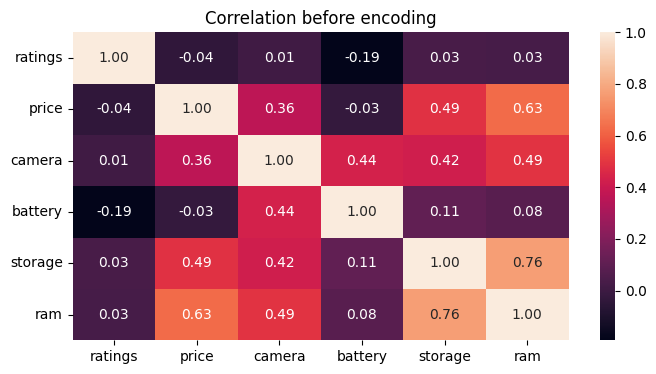

In [36]:
data = pd.DataFrame(df[['ratings', 'price', 'camera', 'battery', 'storage', 'ram']])
correlation_matrix = data.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation before encoding')
plt.show()

In [37]:
df.display.value_counts()

display
other_types    250
LCD             70
HD+ AMOLED      43
AMOLED          39
TFT              5
Name: count, dtype: int64

In [38]:
#perform encoding in the "display" feature
encoded_display = pd.get_dummies(df.display, drop_first=True)
encoded_display = encoded_display.astype(bool).astype(int)
print(encoded_display.head())

                                             HD+ AMOLED  LCD  TFT  other_types
name                                                                          
SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)            0    0    0            1
SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)           0    0    0            1
SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)           0    0    0            1
SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)           0    0    0            1
SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)             0    0    0            1


In [39]:
df = pd.concat([df,encoded_display], axis=1)

In [40]:
df.processor.value_counts()

processor
not mentioned              274
MediaTek                    16
Gen8                        14
Dimensity1080,              12
Dimensity700                 9
Snapdragon720GProcessor      8
Snapdragon1P                 8
Snapdragon750GProcessor      7
Heilo80P                     7
Heilo356765                  7
Snapdragon(SDM450-F01)       7
Snapdragon695                5
Snapdragon450P               5
Dimensity720                 4
Snapdragon888                4
Heilo35P                     4
Snapdragon450                4
Snapdragon(SDM439)           4
Heilo806769                  2
Snapdragon750G               2
Snapdragon425P               2
Heilo67653512                1
Snapdragon410                1
Name: count, dtype: int64

In [41]:
#perform encoding in the "processor" feature
encoded_processor = pd.get_dummies(df.processor, drop_first=True)
encoded_processor = encoded_processor.astype(bool).astype(int)
print(encoded_processor.head())

                                             Dimensity700  Dimensity720  Gen8  \
name                                                                            
SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)              0             0     0   
SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)             0             0     0   
SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)             0             0     0   
SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)             0             0     0   
SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)               0             0     0   

                                             Heilo356765  Heilo35P  \
name                                                                 
SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)             0         0   
SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)            0         0   
SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)            0         0   
SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)            0         0   
SAMSUNG Gala

In [42]:
df = pd.concat([df,encoded_processor], axis=1)

In [43]:
df=df.drop(['display','processor'],axis=1)

In [44]:
df.head()

,ratings,price,camera,battery,storage,ram,HD+ AMOLED,LCD,TFT,other_types,...,Snapdragon410,Snapdragon425P,Snapdragon450,Snapdragon450P,Snapdragon695,Snapdragon720GProcessor,Snapdragon750G,Snapdragon750GProcessor,Snapdragon888,not mentioned
name,,,,,,,,,,,,,,,,,,,,,
"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,50,6000,64,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,50,6000,128,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,50,6000,128,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,50,6000,128,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,50,5000,128,6,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [45]:
df.columns

Index(['ratings', 'price', 'camera', 'battery', 'storage', 'ram', 'HD+ AMOLED',
       'LCD', 'TFT', 'other_types', 'Dimensity700', 'Dimensity720', 'Gen8',
       'Heilo356765', 'Heilo35P', 'Heilo67653512', 'Heilo806769', 'Heilo80P',
       'MediaTek', 'Snapdragon(SDM439)', 'Snapdragon(SDM450-F01)',
       'Snapdragon1P', 'Snapdragon410', 'Snapdragon425P', 'Snapdragon450',
       'Snapdragon450P', 'Snapdragon695', 'Snapdragon720GProcessor',
       'Snapdragon750G', 'Snapdragon750GProcessor', 'Snapdragon888',
       'not mentioned'],
      dtype='object')

In [46]:
df['other_display']=df['other_types']
#df['other_processor']=df['not mentioned']
#df=df.drop('not mentioned',axis=1)
df=df.drop('other_types',axis=1)
df.columns

Index(['ratings', 'price', 'camera', 'battery', 'storage', 'ram', 'HD+ AMOLED',
       'LCD', 'TFT', 'Dimensity700', 'Dimensity720', 'Gen8', 'Heilo356765',
       'Heilo35P', 'Heilo67653512', 'Heilo806769', 'Heilo80P', 'MediaTek',
       'Snapdragon(SDM439)', 'Snapdragon(SDM450-F01)', 'Snapdragon1P',
       'Snapdragon410', 'Snapdragon425P', 'Snapdragon450', 'Snapdragon450P',
       'Snapdragon695', 'Snapdragon720GProcessor', 'Snapdragon750G',
       'Snapdragon750GProcessor', 'Snapdragon888', 'not mentioned',
       'other_display'],
      dtype='object')

In [47]:
df.describe()

,ratings,price,camera,battery,storage,ram,HD+ AMOLED,LCD,TFT,Dimensity700,...,Snapdragon425P,Snapdragon450,Snapdragon450P,Snapdragon695,Snapdragon720GProcessor,Snapdragon750G,Snapdragon750GProcessor,Snapdragon888,not mentioned,other_display
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,4.203931,17363.245700,42.567568,4956.511057,103.447174,5.398034,0.105651,0.171990,0.012285,0.022113,...,0.004914,0.009828,0.012285,0.012285,0.019656,0.004914,0.017199,0.009828,0.673219,0.614251
std,0.150481,6735.647203,20.860662,850.123500,50.416360,1.951076,0.307769,0.377836,0.110290,0.147232,...,0.070014,0.098769,0.110290,0.110290,0.138986,0.070014,0.130172,0.098769,0.469614,0.487371
min,3.800000,6490.000000,0.000000,3000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.100000,11982.500000,20.000000,4500.000000,64.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000,15999.000000,48.000000,5000.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,4.300000,21744.500000,50.000000,5500.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4.600000,32000.000000,95.000000,7000.000000,224.000000,9.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x=df.drop('price', axis=1)
y= df['price']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [49]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [50]:
classifier = LinearRegression()
classifier.fit(X_train_norm, y_train)

LinearRegression()

In [51]:
y_pred = classifier.predict(X_test_norm)

In [64]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2*100} %")

R-squared score: 51.0127213161768 %


In [70]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("R-squared score:",r2_rf*100, "%")

R-squared score: 74.24371403017572 %


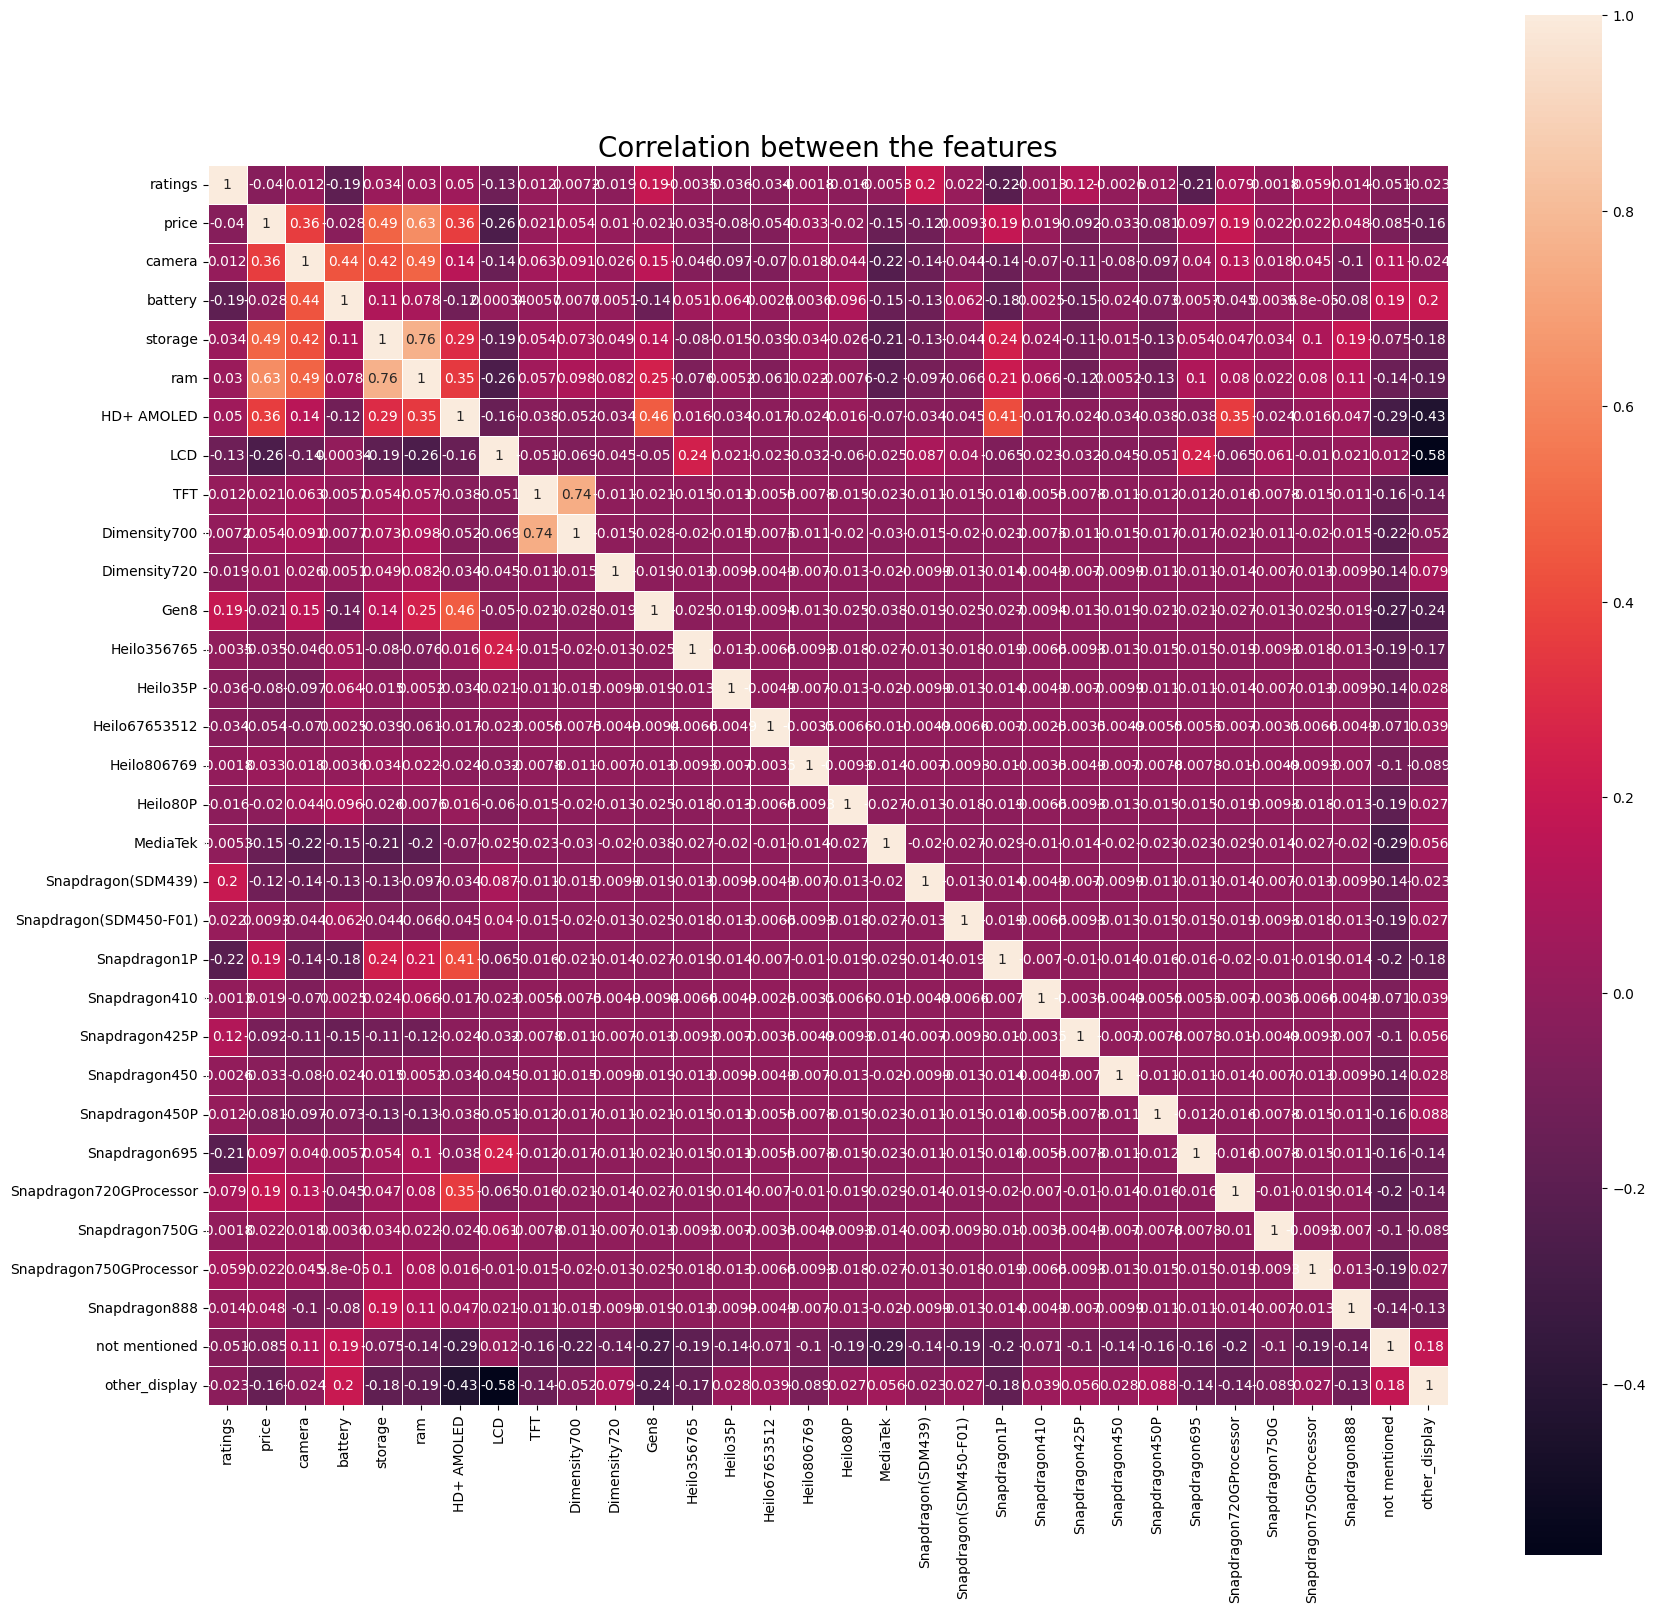

In [54]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, square=True)
plt.title('Correlation between the features',fontsize=20)
plt.show()

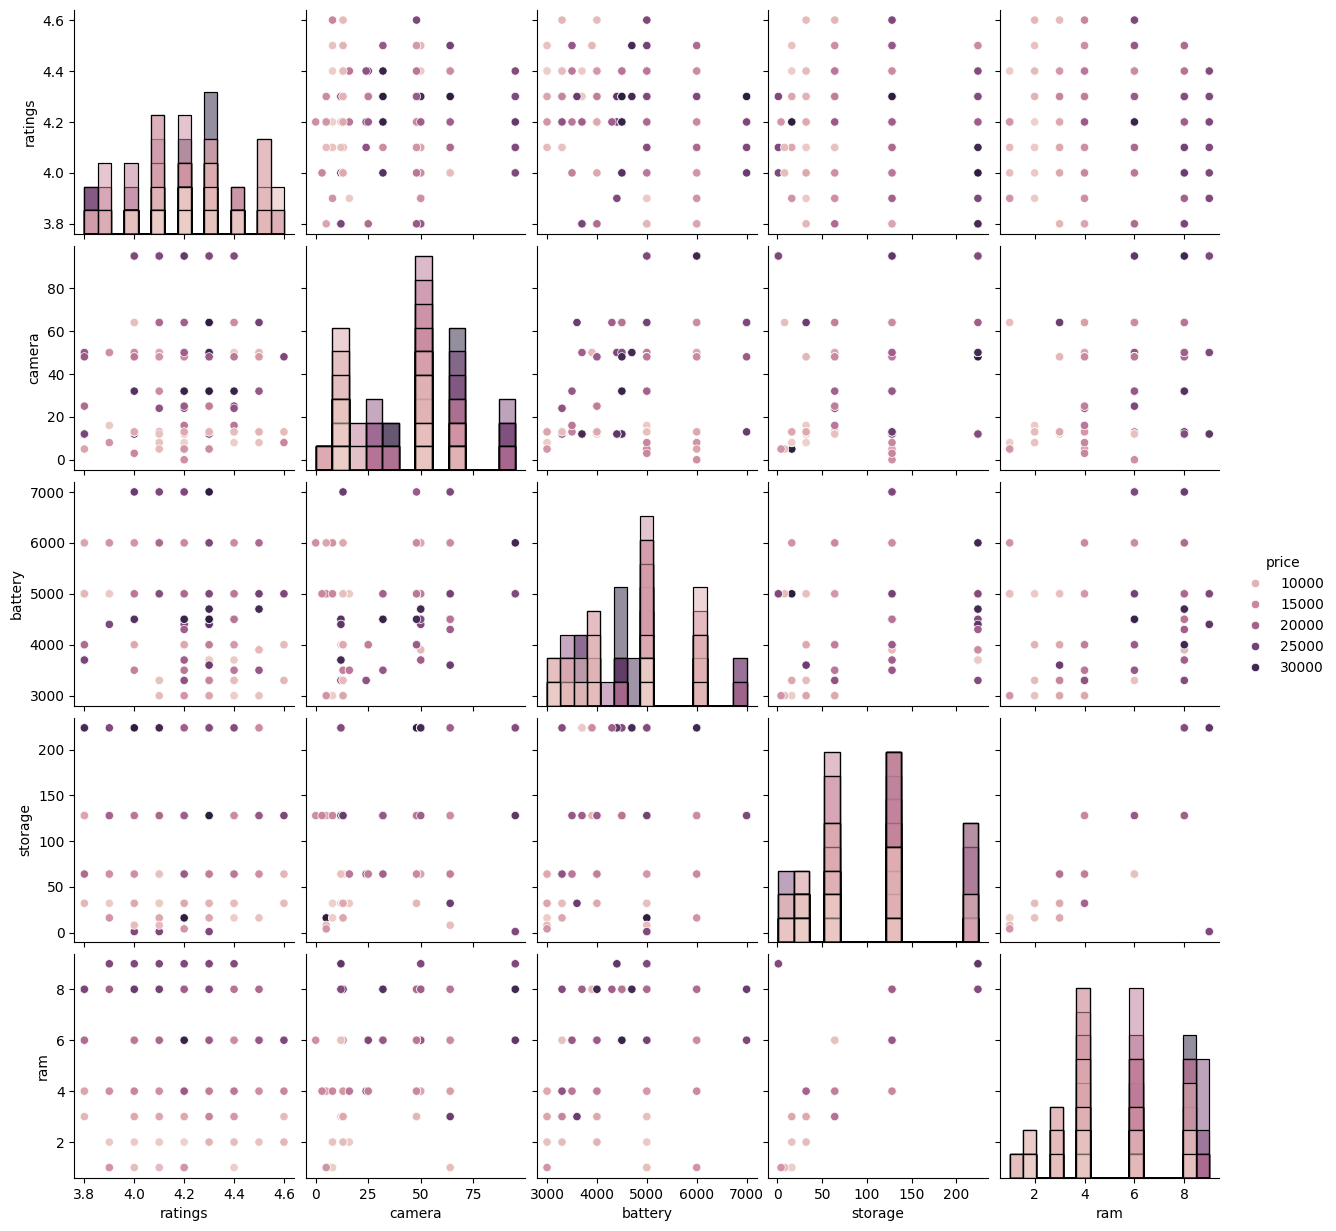

In [55]:
data=pd.DataFrame(df[['ratings', 'price', 'camera', 'battery', 'storage', 'ram']])
sns.pairplot(data,hue='price',diag_kind='hist')
plt.show() 

In [56]:
#visualize the main features

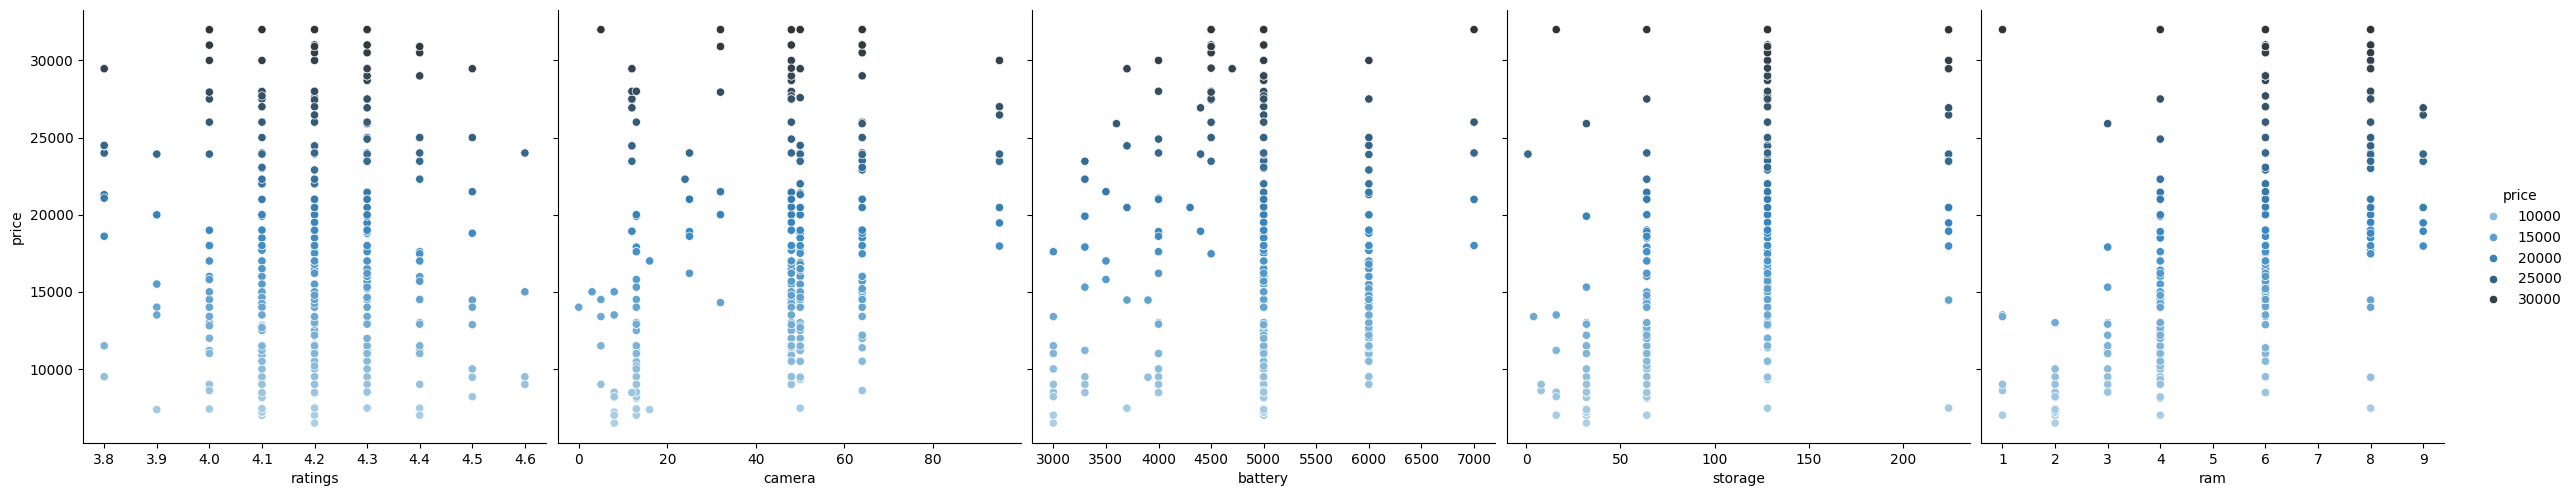

In [57]:
sns.pairplot(df, x_vars=['ratings', 'camera', 'battery', 'storage', 'ram'], y_vars='price',height=5,hue='price',palette='Blues_d')
plt.show()

In [58]:
x_main_feature=df[['price','ratings','camera', 'battery', 'storage', 'ram']]
y_main_feature = df.price

In [59]:
main_features_titles=['price','ratings', 'camera', 'battery', 'storage', 'ram']

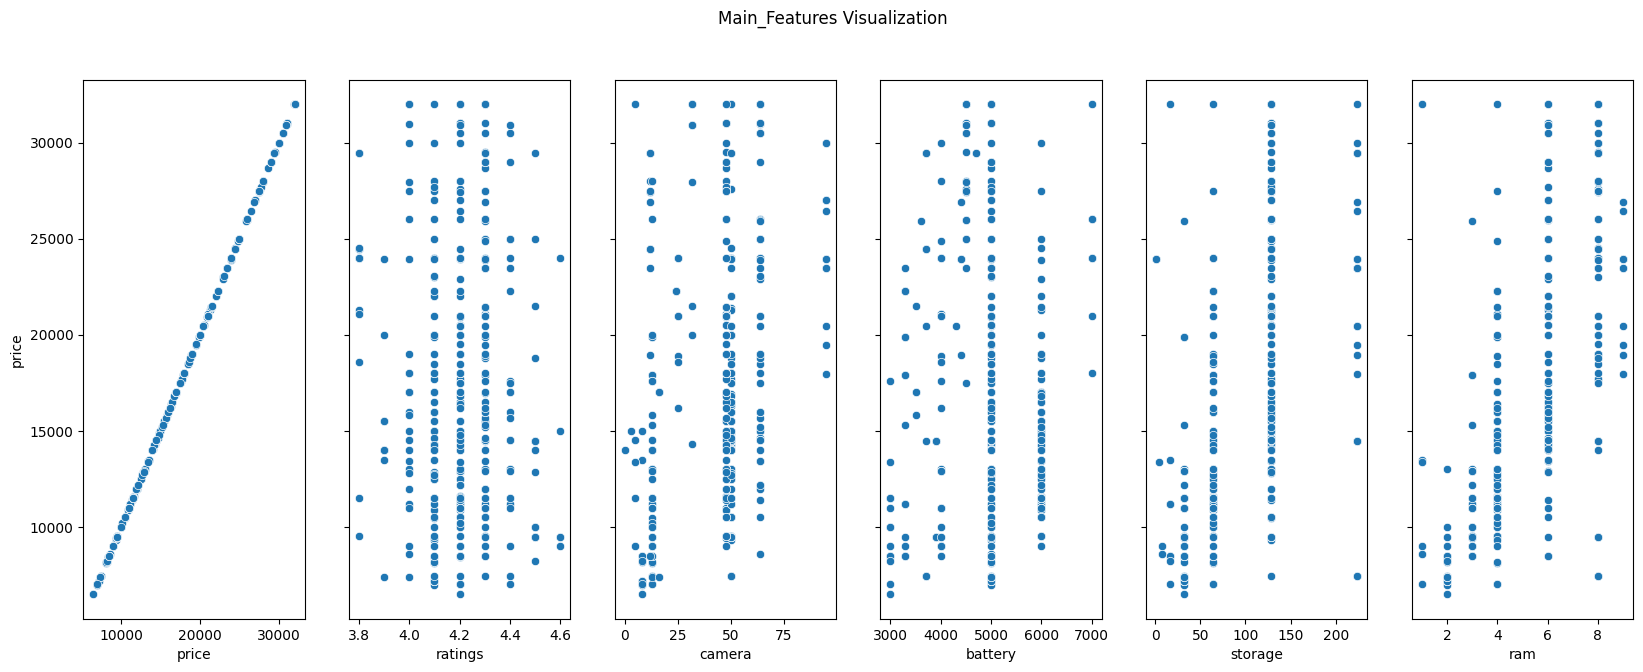

In [60]:
# more effective to visualize this way
fig, ax = plt.subplots(1, x_main_feature.shape[1], sharey = True, figsize = (20,7))
for i in range(len(ax)):
  sns.scatterplot(x = x_main_feature.iloc[:, i], y = y_main_feature, ax = ax[i])
  ax[i].set_xlabel(main_features_titles[i])
fig.suptitle('Main_Features Visualization')
plt.show()

In [61]:
# Reset the style to default
plt.style.use('default')

In [62]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
